# Classification of Numerals of the Devanagri script using CNN.

## Importing libraries

In [40]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Using ImageDataGenerator Class of Keras to load image datasets from folder

In [41]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    data_format = 'channels_last')

### Loading the training data

In [42]:
train_generator = train_datagen.flow_from_directory('./Numeral/train/',
                                                   target_size = (70,70),
                                                   batch_size = 8,
                                                   class_mode = 'categorical')

Found 106 images belonging to 10 classes.


In [43]:
train_generator[2][0][0].shape

(70, 70, 3)

### Peek into the images

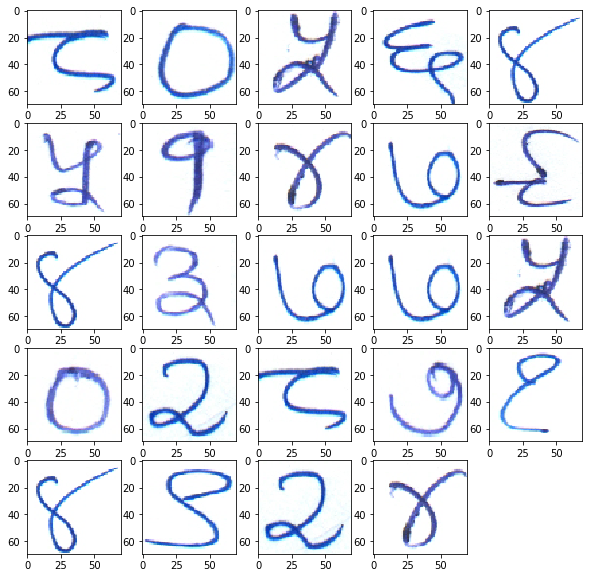

In [44]:
fig = plt.figure(figsize=(10,10))
index = 1
for i in range(1,5):
    for j in range(1,7):
        img = train_generator[i][0][j]
        fig.add_subplot(5,5,index)
        plt.imshow(img)
        index += 1
plt.show()

### Loading the validation data

In [62]:
valid_generator = train_datagen.flow_from_directory('./Numeral/valid/',
                                                   target_size = (70,70),
                                                   batch_size = 8,
                                                   class_mode = 'categorical')

Found 28 images belonging to 10 classes.


## Building the CNN model

In [51]:
model = Sequential()
model.add(Conv2D(6, (3,3), input_shape = (70,70,3), activation='relu', name='conv_1'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
model.add(BatchNormalization(name='batch_norm_1'))

model.add(Conv2D(10, (3,3), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
model.add(BatchNormalization(name='batch_norm_2'))

model.add(Flatten(name='flatten_1'))
model.add(Dense(60, activation='relu', name='dense_1'))
model.add(Dropout(0.25, name='dropout_1'))
model.add(Dense(10, activation='softmax', name='dense_2'))

model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

### Model Summary

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 68, 68, 6)         168       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 34, 34, 6)         0         
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 34, 34, 6)         24        
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 10)        550       
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 16, 16, 10)        0         
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 16, 16, 10)        40        
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
__________

## Training the model

In [53]:
es = EarlyStopping(monitor='val_acc', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model.fit_generator(train_generator,
                   epochs = 100,
                   validation_data = valid_generator,
                   verbose = 1,
                   callbacks = [reduce_lr, es])

Epoch 1/100
14/14 [==============================] - 2s 107ms/step - loss: 1.1975 - acc: 0.6972 - val_loss: 0.0521 - val_acc: 1.0000
Epoch 2/100
14/14 [==============================] - 1s 43ms/step - loss: 0.0640 - acc: 1.0000 - val_loss: 0.0185 - val_acc: 1.0000


In [54]:
#model.save_weights('weights.h5')

In [60]:
train_generator[0][0].shape

(8, 70, 70, 3)

ValueError: Asked to retrieve element 4, but the Sequence has length 4

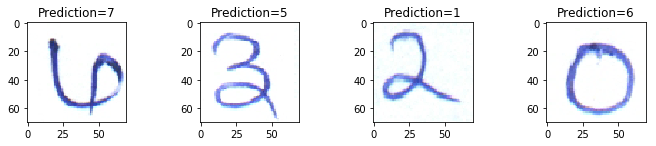

In [61]:
fig = plt.figure(figsize=(15,15))
for i in range(1,28):
    img = valid_generator[i-1][0][0]
    fig.add_subplot(7,5,i)
    plt.imshow(img)
    plt.title('Prediction='+str(valid_preds[i-1]))
plt.show()

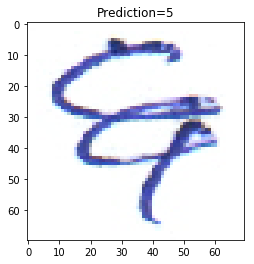

In [67]:
plt.imshow(valid_generator[0][0][1])
plt.title('Prediction='+str(valid_preds[1]))
plt.show()

### Loading the test data

In [37]:
test_datagen = ImageDataGenerator(
    rescale = 1. /255,
    data_format = 'channels_last')

test_generator = test_datagen.flow_from_directory( 'Numeral/test/',
                                                 target_size = (70,70),
                                                 batch_size = 1,
                                                 class_mode = None)

Found 30 images belonging to 10 classes.


## Generating the predictions based on the test data

In [38]:
predictions = model.predict_generator(test_generator)
predictions = np.argmax(predictions, axis = 1)

## Graphical representation of the test data and the predicted output

ValueError: Asked to retrieve element 30, but the Sequence has length 30

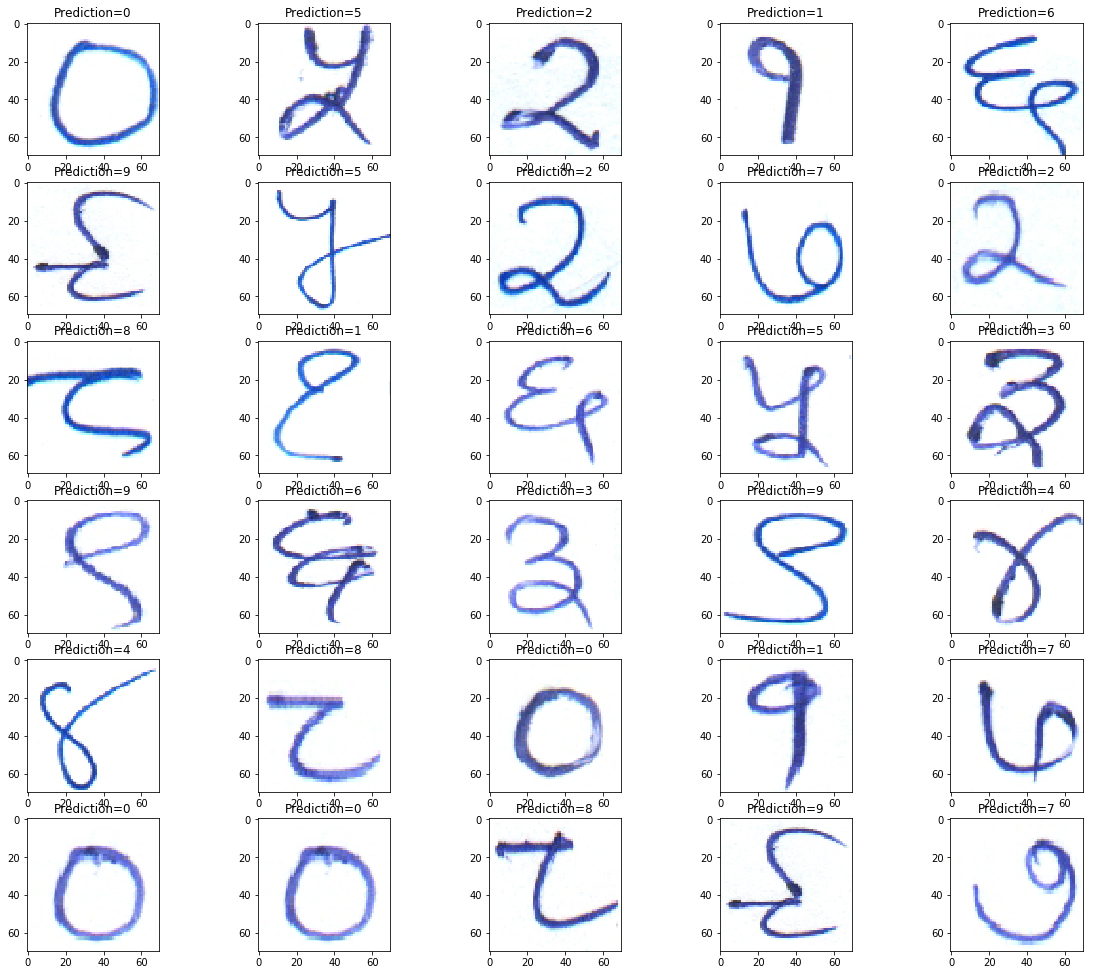

In [39]:
fig = plt.figure(figsize=(20,20))
for i in range(1,35):
    img = test_generator[i-1][0]
    fig.add_subplot(7,5,i)
    plt.imshow(img)
    plt.title('Prediction='+str(predictions[i-1]))
plt.show()